In [1]:
import pandas as pd

data = pd.read_csv("/kaggle/input/air-quality-data-in-india/city_day.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [2]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
data.dropna(axis=0, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6236 entries, 2123 to 29529
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6236 non-null   object 
 1   Date        6236 non-null   object 
 2   PM2.5       6236 non-null   float64
 3   PM10        6236 non-null   float64
 4   NO          6236 non-null   float64
 5   NO2         6236 non-null   float64
 6   NOx         6236 non-null   float64
 7   NH3         6236 non-null   float64
 8   CO          6236 non-null   float64
 9   SO2         6236 non-null   float64
 10  O3          6236 non-null   float64
 11  Benzene     6236 non-null   float64
 12  Toluene     6236 non-null   float64
 13  Xylene      6236 non-null   float64
 14  AQI         6236 non-null   float64
 15  AQI_Bucket  6236 non-null   object 
dtypes: float64(13), object(3)
memory usage: 828.2+ KB


In [6]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [7]:
import plotly.express as px

data['Date'] = pd.to_datetime(data['Date'])

fig1 = px.line(data, x='Date', y='AQI', color='City', title='AQI Trend Over Time')
fig1.show()

# Box plot for AQI distribution by City
fig2 = px.box(data, x='City', y='AQI', title='AQI Distribution by City')
fig2.update_layout(xaxis={'categoryorder':'total descending'})
fig2.show()

# Scatter plot matrix for selected features
selected_features = ['PM2.5', 'NO2', 'CO', 'O3', 'AQI']
fig3 = px.scatter_matrix(data[selected_features], title='Scatter Plot Matrix')
fig3.show()

/opt/conda/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3



In [9]:
feature_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

In [10]:
# Splitting the dataset into features (X) and target (y)
X = data[feature_columns]
y = data['AQI']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# Defining and compiling the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
# Training the model
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2)


Epoch 1/150
125/125 [==============================] - 3s 4ms/step - loss: 26112.2363 - val_loss: 20103.0664
Epoch 2/150
125/125 [==============================] - 0s 3ms/step - loss: 9626.8057 - val_loss: 4816.3921
Epoch 3/150
125/125 [==============================] - 0s 3ms/step - loss: 3614.9751 - val_loss: 2990.0330
Epoch 4/150
125/125 [==============================] - 0s 3ms/step - loss: 2353.3657 - val_loss: 2002.2032
Epoch 5/150
125/125 [==============================] - 0s 3ms/step - loss: 1690.5013 - val_loss: 1440.6993
Epoch 6/150
125/125 [==============================] - 1s 5ms/step - loss: 1335.4183 - val_loss: 1163.7585
Epoch 7/150
125/125 [==============================] - 0s 3ms/step - loss: 1150.6223 - val_loss: 1015.8346
Epoch 8/150
125/125 [==============================] - 0s 3ms/step - loss: 1041.3506 - val_loss: 919.5385
Epoch 9/150
125/125 [==============================] - 0s 3ms/step - loss: 969.0508 - val_loss: 854.6726
Epoch 10/150
125/125 [================

In [14]:
# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Data:", loss)

39/39 [==============================] - 0s 2ms/step - loss: 460.1826
Mean Squared Error on Test Data: 460.18255615234375


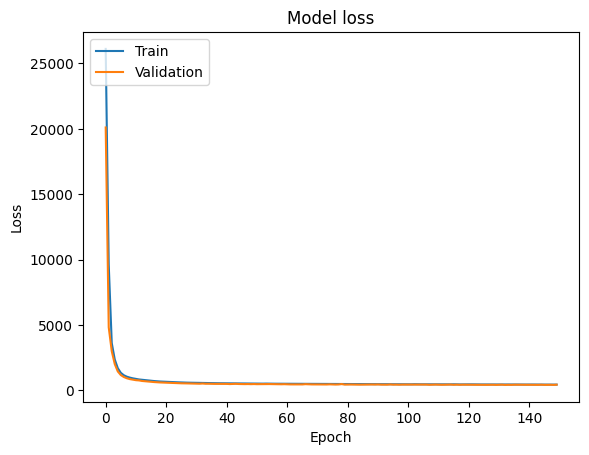

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [16]:
model.save('/kaggle/working/model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [17]:
user_input = pd.DataFrame({
    'PM2.5': [81],
    'PM10': [124],
    'NO': [1.44],
    'NO2': [20],
    'NOx': [12],
    'NH3': [10],
    'CO': [0.1],
    'SO2': [15],
    'O3': [127],
    'Benzene': [0.20],
    'Toluene': [6],
    'Xylene': [0.06]
})

user_input_scaled = scaler.transform(user_input)

user_pred = model.predict(user_input_scaled)

print(f"Predicted AQI: {user_pred[0][0]}")

1/1 [==============================] - 0s 85ms/step
Predicted AQI: 192.08609008789062
